In [332]:
import pandas as pd
import seaborn as sns
sns.set_palette("colorblind")
sns.set_style("darkgrid")

# Gas Dataset load and data prep

In [333]:
df_total = pd.read_csv (r'..\\DataSet\\2004-2021.tsv', sep = '\t')
product_gasolina_comum = df_total['PRODUTO']=="GASOLINA COMUM"
df_gas = df_total[product_gasolina_comum]

df_gas = df_gas.drop(['PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'DATA FINAL', 'PRODUTO', 'ESTADO'], axis=1)

df_gas['DATA INICIAL'] = pd.to_datetime(df_gas['DATA INICIAL'], format='%Y-%m-%d')
df_gas['MES'] = pd.DatetimeIndex(df_gas['DATA INICIAL']).month
df_gas['ANO'] = pd.DatetimeIndex(df_gas['DATA INICIAL']).year
df_gas.columns = df_gas.columns.str.replace(" ", "_")
df_gas.columns = df_gas.columns.str.replace("'", "")
# print(dfGas.dtypes)
df_gas_total_gp = df_gas.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()


In [334]:
def count_plot(column, df, title=None, xlabel=None, ylabel=None, rot=None):

    fig, ax = plt.subplots(figsize=(14,6))
    ax = sns.countplot(x=column, data=df)
    plt.title(title, fontsize=28)
    plt.xlabel(ylabel, fontsize=22)
    plt.ylabel(xlabel, fontsize=24)
    plt.xticks(rotation=rot, fontsize=20)
    plt.yticks(fontsize=16)
    plt.tight_layout()

    plt.show()

NORDESTE        0.333347
NORTE           0.259228
CENTRO OESTE    0.148154
SUDESTE         0.148154
SUL             0.111116
Name: REGIÃO, dtype: float64


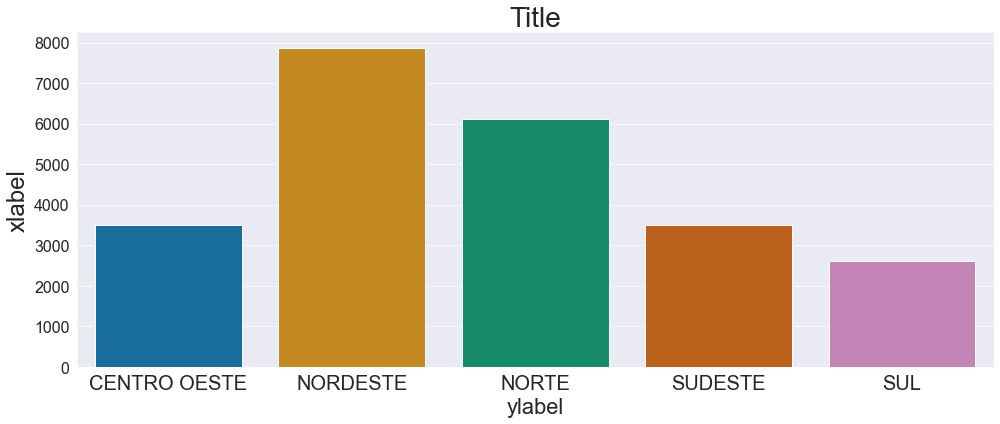

,DATA_INICIAL,REGIÃO,NÚMERO_DE_POSTOS_PESQUISADOS,UNIDADE_DE_MEDIDA,PREÇO_MÉDIO_REVENDA,DESVIO_PADRÃO_REVENDA,PREÇO_MÍNIMO_REVENDA,PREÇO_MÁXIMO_REVENDA,MARGEM_MÉDIA_REVENDA,COEF_DE_VARIAÇÃO_REVENDA,MES,ANO
12064,2004-05-09,CENTRO OESTE,128,R$/l,2.029,0.007,1.990,2.070,0.318,0.003,5,2004
12065,2004-05-09,CENTRO OESTE,395,R$/l,2.025,0.062,1.850,2.220,0.296,0.031,5,2004
12066,2004-05-09,CENTRO OESTE,194,R$/l,2.358,0.066,2.000,2.540,0.472,0.028,5,2004
12067,2004-05-09,CENTRO OESTE,166,R$/l,2.120,0.075,1.970,2.440,0.325,0.035,5,2004
12068,2004-05-09,NORDESTE,106,R$/l,2.090,0.034,2.000,2.159,0.35,0.016,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
120721,2021-04-25,NORTE,12,R$/l,5.364,0.065,5.310,5.530,-99999.0,0.012,4,2021
120722,2021-04-25,SUL,119,R$/l,5.051,0.251,4.640,5.599,-99999.0,0.050,4,2021
120723,2021-04-25,SUDESTE,1187,R$/l,5.265,0.218,4.279,6.099,-99999.0,0.041,4,2021
120724,2021-04-25,NORDESTE,34,R$/l,5.586,0.088,5.410,5.699,-99999.0,0.016,4,2021


In [335]:
region_centro_oeste = df_gas['REGIÃO']=="CENTRO OESTE"
df_gas_centro_oeste = df_gas[region_centro_oeste]
df_gas_centro_oeste_gp = df_gas_centro_oeste.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
#dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
#df_gas_centro_oeste_gp
print(df_gas.REGIÃO.value_counts(normalize=True))
count_plot("REGIÃO", df_gas, title="Title", xlabel="xlabel", ylabel="ylabel")
df_gas

In [336]:
region_nordeste = df_gas['REGIÃO']=="NORDESTE"
df_gas_nordeste = df_gas[region_nordeste]
df_gas_nordeste_gp = df_gas_nordeste.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
#dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
df_gas_nordeste_gp

NÚMERO_DE_POSTOS_PESQUISADOS  PREÇO_MÉDIO_REVENDA  \
ANO  MES REGIÃO                                                        
2004 5   NORDESTE                    226.194444             2.040972   
     6   NORDESTE                    225.722222             2.120583   
     7   NORDESTE                    225.083333             2.163056   
     8   NORDESTE                    225.222222             2.172822   
     9   NORDESTE                    226.138889             2.173278   
...                                         ...                  ...   
2020 12  NORDESTE                     57.305556             4.605083   
2021 1   NORDESTE                     63.600000             4.755800   
     2   NORDESTE                     67.388889             5.130806   
     3   NORDESTE                     71.222222             5.545556   
     4   NORDESTE                     64.444444             5.425139   

                   DESVIO_PADRÃO_REVENDA  PREÇO_MÍNIMO_REVENDA  \
ANO  MES REGIÃO                                                  
2004 5   NORDESTE               0.075139              1.842750   
     6   NORDESTE               0.070444              1.919000   
     7   NORDESTE               0.078306              1.975694   
     8   NORDESTE               0.069133              1.999356   
     9   NORDESTE               0.074194              1.991528   
...                                  ...                   ...   
2020 12  NORDESTE               0.104500              4.418194   
2021 1   NORDESTE               0.103933              4.554889   
     2   NORDESTE               0.135111              4.841194   
     3   NORDESTE               0.135639              5.225111   
     4   NORDESTE               0.130583              5.203472   

                   PREÇO_MÁXIMO_REVENDA  COEF_DE_VARIAÇÃO_REVENDA  
ANO  MES REGIÃO                                                    
2004 5   NORDESTE              2.216083                  0.036778  
     6   NORDESTE              2.307583                  0.033306  
     7   NORDESTE              2.329611                  0.036083  
     8   NORDESTE              2.337578                  0.031844  
     9   NORDESTE              2.345611                  0.033944  
...                                 ...                       ...  
2020 12  NORDESTE              4.820444                  0.022861  
2021 1   NORDESTE              4.997778                  0.021756  
     2   NORDESTE              5.451667                  0.026194  
     3   NORDESTE              5.867694                  0.024389  
     4   NORDESTE              5.758056                  0.024083  

[203 rows x 6 columns]

In [337]:
region_sudeste = df_gas['REGIÃO']=='SUDESTE'
df_gas_sudeste = df_gas[region_sudeste]
df_Gas_sudeste_gp = df_gas_sudeste.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
df_Gas_sudeste_gp

NÚMERO_DE_POSTOS_PESQUISADOS  PREÇO_MÉDIO_REVENDA  \
ANO  MES REGIÃO                                                       
2004 5   SUDESTE                     1700.8750             1.986938   
     6   SUDESTE                     1707.5625             2.066125   
     7   SUDESTE                     1709.5625             2.106625   
     8   SUDESTE                     1711.4500             2.114150   
     9   SUDESTE                     1710.3125             2.125938   
...                                        ...                  ...   
2020 12  SUDESTE                      266.0625             4.540250   
2021 1   SUDESTE                      296.6500             4.702800   
     2   SUDESTE                      339.1875             5.136875   
     3   SUDESTE                      399.3750             5.673687   
     4   SUDESTE                      421.8125             5.649188   

                  DESVIO_PADRÃO_REVENDA  PREÇO_MÍNIMO_REVENDA  \
ANO  MES REGIÃO                                                 
2004 5   SUDESTE               0.095250              1.698500   
     6   SUDESTE               0.096312              1.750375   
     7   SUDESTE               0.091375              1.804750   
     8   SUDESTE               0.095200              1.826050   
     9   SUDESTE               0.085750              1.848250   
...                                 ...                   ...   
2020 12  SUDESTE               0.154312              4.126625   
2021 1   SUDESTE               0.162000              4.295050   
     2   SUDESTE               0.186000              4.684188   
     3   SUDESTE               0.189062              5.075938   
     4   SUDESTE               0.187688              5.083812   

                  PREÇO_MÁXIMO_REVENDA  COEF_DE_VARIAÇÃO_REVENDA  
ANO  MES REGIÃO                                                   
2004 5   SUDESTE              2.333063                  0.047875  
     6   SUDESTE              2.399125                  0.046812  
     7   SUDESTE              2.422875                  0.043375  
     8   SUDESTE              2.426650                  0.045050  
     9   SUDESTE              2.429938                  0.040313  
...                                ...                       ...  
2020 12  SUDESTE              4.983500                  0.034250  
2021 1   SUDESTE              5.225000                  0.034900  
     2   SUDESTE              5.704688                  0.036375  
     3   SUDESTE              6.216938                  0.033438  
     4   SUDESTE              6.214688                  0.033438  

[203 rows x 6 columns]

In [338]:
region_sul = df_gas['REGIÃO']=='SUL'
df_gas_sul = df_gas[region_sul]
df_gas_sul_gp = df_gas_sul.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
df_gas_sul_gp

NÚMERO_DE_POSTOS_PESQUISADOS  PREÇO_MÉDIO_REVENDA  \
ANO  MES REGIÃO                                                      
2004 5   SUL                       698.416667             2.060500   
     6   SUL                       694.833333             2.156167   
     7   SUL                       701.916667             2.188250   
     8   SUL                       699.266667             2.211200   
     9   SUL                       694.250000             2.204500   
...                                       ...                  ...   
2020 12  SUL                       122.500000             4.408667   
2021 1   SUL                       147.800000             4.555800   
     2   SUL                       166.666667             4.981583   
     3   SUL                       163.833333             5.442167   
     4   SUL                       172.166667             5.303000   

                 DESVIO_PADRÃO_REVENDA  PREÇO_MÍNIMO_REVENDA  \
ANO  MES REGIÃO                                                
2004 5   SUL                  0.086083              1.803917   
     6   SUL                  0.085667              1.878583   
     7   SUL                  0.087250              1.930500   
     8   SUL                  0.078800              1.968933   
     9   SUL                  0.081917              1.987167   
...                                ...                   ...   
2020 12  SUL                  0.156333              4.153083   
2021 1   SUL                  0.161533              4.243800   
     2   SUL                  0.170500              4.597667   
     3   SUL                  0.200500              4.967750   
     4   SUL                  0.221750              4.969417   

                 PREÇO_MÁXIMO_REVENDA  COEF_DE_VARIAÇÃO_REVENDA  
ANO  MES REGIÃO                                                  
2004 5   SUL                 2.345167                  0.041500  
     6   SUL                 2.434000                  0.039583  
     7   SUL                 2.521667                  0.039750  
     8   SUL                 2.505333                  0.035467  
     9   SUL                 2.476250                  0.036917  
...                               ...                       ...  
2020 12  SUL                 4.912750                  0.035250  
2021 1   SUL                 5.104667                  0.035200  
     2   SUL                 5.548333                  0.034167  
     3   SUL                 6.012417                  0.036667  
     4   SUL                 6.039833                  0.041750  

[203 rows x 6 columns]

In [339]:
region_norte = df_gas['REGIÃO']=='NORTE'
df_gas_norte = df_gas[region_norte]
#df_gas_norte_gp = df_gas_norte.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
#df_gas_norte_gp
df_gas_norte

,DATA_INICIAL,REGIÃO,NÚMERO_DE_POSTOS_PESQUISADOS,UNIDADE_DE_MEDIDA,PREÇO_MÉDIO_REVENDA,DESVIO_PADRÃO_REVENDA,PREÇO_MÍNIMO_REVENDA,PREÇO_MÁXIMO_REVENDA,MARGEM_MÉDIA_REVENDA,COEF_DE_VARIAÇÃO_REVENDA,MES,ANO
12077,2004-05-09,NORTE,48,R$/l,2.388,0.166,1.850,2.850,0.545,0.070,5,2004
12078,2004-05-09,NORTE,45,R$/l,2.175,0.050,2.080,2.310,0.29,0.023,5,2004
12079,2004-05-09,NORTE,129,R$/l,2.044,0.098,1.770,2.400,0.338,0.048,5,2004
12080,2004-05-09,NORTE,207,R$/l,2.332,0.136,1.990,2.620,0.397,0.058,5,2004
12081,2004-05-09,NORTE,106,R$/l,2.336,0.114,2.120,2.780,0.53,0.049,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
120702,2021-04-25,NORTE,54,R$/l,5.493,0.124,5.390,5.800,-99999.0,0.023,4,2021
120712,2021-04-25,NORTE,47,R$/l,5.447,0.281,4.979,6.100,-99999.0,0.052,4,2021
120720,2021-04-25,NORTE,34,R$/l,5.629,0.144,5.500,5.920,-99999.0,0.026,4,2021
120721,2021-04-25,NORTE,12,R$/l,5.364,0.065,5.310,5.530,-99999.0,0.012,4,2021


# Petroleum Dataset load and data prep

In [340]:
csv_location = '..\\DataSet\\Petróleo Brent Futuros Dados Históricos.csv'
df_petroleo = pd.read_csv (csv_location)

In [341]:
df_petroleo['Data'] = pd.to_datetime(df_petroleo['Data'], format='%d.%m.%Y')
df_petroleo['MES'] = pd.DatetimeIndex(df_petroleo['Data']).month
df_petroleo['ANO'] = pd.DatetimeIndex(df_petroleo['Data']).year

df_petroleo['Último'] = df_petroleo['Último'].astype('str')
df_petroleo['Último'] = df_petroleo['Último'].str.replace(',', '.')
df_petroleo['Último'] = pd.to_numeric(df_petroleo['Último'], errors='coerce')

#dfPetro['Último'] = dfPetro['Último'].astype('str') 
#dfPetro.apply(lambda x: x.str.replace(',','.'))
#dfPetro['Último'] = dfPetro['Último'].astype(float)
#print(dfPetro.dtypes)
#dfPetro

In [342]:
df_petroleo

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,MES,ANO
0,2021-12-31,77.78,"78,81","79,68","77,55","148,96K","-1,94%",12,2021
1,2021-12-30,79.32,"79,19","79,66","78,50","10,90K","0,11%",12,2021
2,2021-12-29,79.23,"79,28","80,17","78,13","69,63K","0,37%",12,2021
3,2021-12-28,78.94,"78,67","79,85","78,48","50,41K","0,43%",12,2021
4,2021-12-27,78.60,"76,32","79,08","75,75","85,39K","3,23%",12,2021
...,...,...,...,...,...,...,...,...,...
2836,2011-01-07,93.33,"94,38","94,58","92,59","165,97K","-1,26%",1,2011
2837,2011-01-06,94.52,"95,70","96,12","94,01","217,45K","-1,03%",1,2011
2838,2011-01-05,95.50,"93,35","95,86","92,37","212,40K","2,11%",1,2011
2839,2011-01-04,93.53,"94,92","95,74","92,58","184,63K","-1,38%",1,2011


In [343]:
df_petroleo_gp = df_petroleo.groupby(by=['ANO', 'MES']).mean()

In [344]:
df_petroleo_gp

Último
ANO  MES            
2011 1     96.907143
     2    104.032000
     3    114.671739
     4    123.090500
     5    114.521818
...              ...
2021 8     70.513636
     9     74.876364
     10    83.746190
     11    80.849545
     12    74.803913

[132 rows x 1 columns]

# Geração de graficos

In [345]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ANO,MES'>

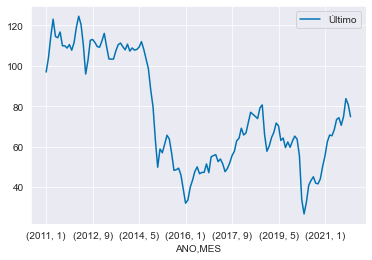

In [346]:
df_petroleo_gp.plot()

<AxesSubplot:xlabel='ANO,MES,REGIÃO'>

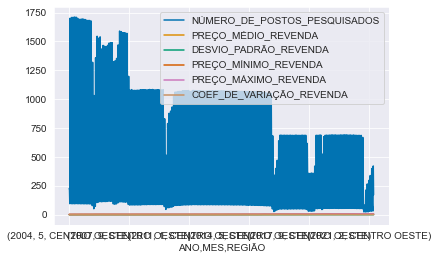

In [347]:
df_gas_total_gp.plot()